In [1]:
import os
from pathlib import Path
import pandas as pd
import yaml
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_yaml(yaml_file_name):
    with open(yaml_file_name) as fp:
        config = yaml.safe_load(fp)
    return config

In [3]:
yaml_inputs = load_yaml("settings.yml")

In [4]:
req_list = yaml_inputs['train_req_cols']

In [5]:
ingested_list  = ['age', 'job_type', 'flnwgt', 'education', 'experience',
       'marital_status', 'job_position', 'relationship', 'race', 'gender',
       'location']

In [10]:
parent_dir = Path.cwd()
data_path = parent_dir.joinpath('data')
filename = 'adult-training.csv'
parent_dir, data_path

(WindowsPath('C:/Users/AZEEM_SIDD/PycharmProjects/ML_Pipeline_Deploy'),
 WindowsPath('C:/Users/AZEEM_SIDD/PycharmProjects/ML_Pipeline_Deploy/data'))

In [11]:
df = pd.read_csv(data_path.joinpath(filename))
df.head(4)

,age,job_type,flnwgt,education,experience,marital_status,job_position,relationship,race,gender,location,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


In [13]:
def column_validation(req_list, df, df_name):
    ingested_list = df.columns
    not_list = []
    for col in req_list:
        if col not in ingested_list:
            not_list.append(col)
    if len(not_list)!=0:
        print(f"Missing columns in the data frame: {df_name}. Here is the list of missing columns:{not_list}")
        x = f"Missing columns in the data frame: {df_name}. Here is the list of missing columns:{not_list}"
        i = 1
        return x,i
    else:
        print(f"Validated {df_name}")
        x= f"Validated {df_name}"
        i = 0
        return x,i

In [12]:
text_response, indicator = column_validation(req_list, df , 'my uploaded df')
text_response, indicator

Validated my uploaded df


('Validated my uploaded df', 0)

In [14]:
def identify_numerical_columns(dataframe):
    """
    Identify numerical columns in a pandas DataFrame.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        
    Returns:
        list: List of column names containing numerical data.
    """
    numerical_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    return numerical_columns

def identify_categorical_columns(dataframe):
    """
    Identify categorical columns in a pandas DataFrame.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        
    Returns:
        list: List of column names containing categorical data.
    """
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

In [16]:
new_df = df.drop('flnwgt', axis=1)
new_df.head()

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
identify_numerical_columns(new_df)

['age', 'experience']

In [18]:
identify_categorical_columns(new_df)

['job_type',
 'education',
 'marital_status',
 'job_position',
 'relationship',
 'race',
 'gender',
 'location',
 'salary']

In [20]:
one_type = new_df['salary'].value_counts().keys()[1]

In [21]:
new_df['target'] = new_df['salary'].apply(lambda x:1 if x==one_type else 0)
new_df

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location,salary,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0


In [23]:
new_df.columns

Index(['age', 'job_type', 'education', 'experience', 'marital_status',
       'job_position', 'relationship', 'race', 'gender', 'location', 'salary',
       'target'],
      dtype='object')

In [25]:
ml_cols = ['age', 'job_type', 'education', 'experience', 'marital_status',
       'job_position', 'relationship', 'race', 'gender', 'location', 
       'target']

In [178]:
ml_df.head(2)

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0


In [179]:
# ml_df['location'].value_counts()

In [172]:
def pre_processing(data, cat_cols):
    for c_col in cat_cols:
        data[c_col] = data[c_col].apply(lambda x:x.strip())
    data['location'] = data['location'].apply(lambda x:np.nan if x=='?' else x)
    return data

In [187]:
ml_df = new_df[ml_cols].copy()
ml_df = pre_processing(ml_df, cat_cols)

In [140]:
# ml_df['location'].value_counts()

In [29]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(ml_df.drop('target', axis=1), 
                                                    ml_df['target'],
                                                    random_state=42,
                                                    stratify= ml_df['target'],
                                                    shuffle=True,
                                                    test_size=0.25)

                                                    

In [189]:
X_train.head(2)

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location
19359,28,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
15003,35,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [32]:
y_train.head(2)

19359    0
15003    0
Name: target, dtype: int64

In [107]:
# Numerical Variables Pipeline

In [33]:
num_cols = ['age', 'experience']

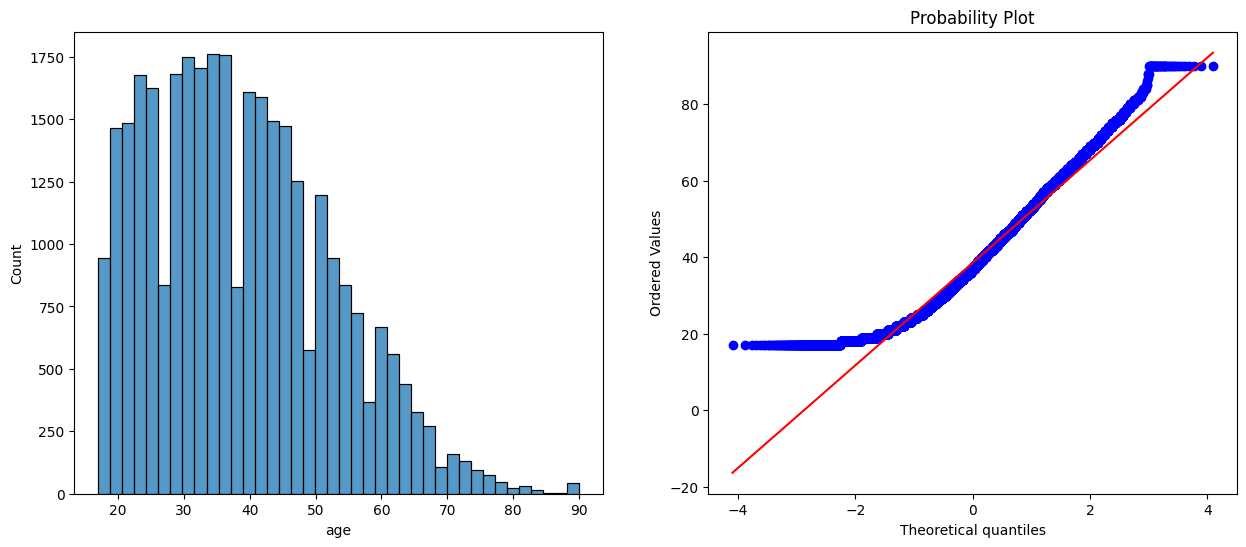

In [37]:
assess_normality(ml_df, 'age')

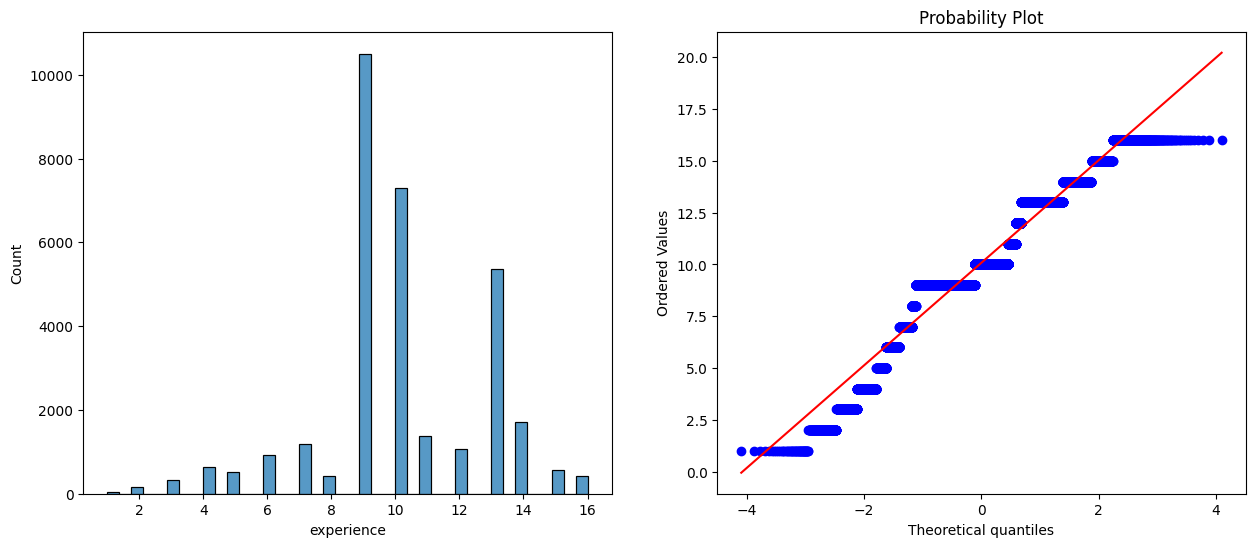

In [38]:
assess_normality(ml_df, 'experience')

In [212]:
from feature_engine.transformation import LogTransformer, YeoJohnsonTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [191]:
num_cols = ['age', 'experience']
num_cols2 = ['age']

In [131]:
# ml_df['location2'].value_counts()

# Transformation 1

In [192]:
num_imputer = MeanMedianImputer(imputation_method='median',variables=num_cols)
X_train_num1 = num_imputer.fit_transform(X_train)
X_test_num1 = num_imputer.transform(X_test)

# Transformation 2

In [193]:
lt = YeoJohnsonTransformer(variables=num_cols2)
X_train_num2 = lt.fit_transform(X_train_num1)
X_test_num2 = lt.transform(X_test_num1)

In [194]:
cat_cols = ['job_type', 'education', 'marital_status',
       'job_position', 'relationship', 'race', 'gender', 'location']

cat_cols1 = ['job_type', 'education', 'marital_status',
       'job_position', 'relationship', 'race', 'gender']

cat_cols2 = ['location']

# Transformation 3

In [195]:
cat_miss_imputer = CategoricalImputer(imputation_method='missing', fill_value='Missing', variables=cat_cols)

X_train_cat1 = cat_miss_imputer.fit_transform(X_train_num2)
X_test_cat1 = cat_miss_imputer.transform(X_test_num2)

# Transformation 4

In [196]:
rare1 = RareLabelEncoder(n_categories = 1, tol= 0.02, variables=cat_cols1)
X_train_cat2 = rare1.fit_transform(X_train_cat1)
X_test_cat2 = rare1.transform(X_test_cat1)

# Transformation 5

In [197]:
rare2 = RareLabelEncoder(n_categories = 1, tol= 0.004, variables=cat_cols2)
X_train_cat3 = rare2.fit_transform(X_train_cat2)
X_test_cat3 = rare2.transform(X_test_cat2)

In [150]:
X_test_cat3['location'].value_counts().keys()

Index([' United-States', 'Rare', 'Missing', ' Mexico', ' Philippines',
       ' Germany'],
      dtype='object', name='location')

# Transformation 6

In [204]:
mean_enc = MeanEncoder(variables=cat_cols)
X_train_cat4 = mean_enc.fit_transform(X_train_cat3, y_train)
X_test_cat4 = mean_enc.transform(X_test_cat3)

In [206]:
X_train_cat4.head(3)

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location
19359,4.367071,0.217583,0.190607,10,0.048304,0.127652,0.105154,0.25642,0.109163,0.245725
15003,4.729062,0.217583,0.231144,12,0.446398,0.262545,0.448189,0.25642,0.306151,0.245725
12490,4.125224,0.217583,0.190607,10,0.048304,0.068506,0.037736,0.25642,0.306151,0.213656


# Transformation 7

In [ ]:
min_max = MinMaxScaler()
X_train_final = min_max.fit_transform(X_train_cat4)
X_test_final = min_max.transform(X_test_cat4)

In [223]:
data_pipeline = Pipeline([
    ('num_imputer', MeanMedianImputer(imputation_method='median',variables=num_cols)),
    ('yt_trans', YeoJohnsonTransformer(variables=num_cols2)),
    ('cat_imputer', CategoricalImputer(imputation_method='missing', fill_value='Missing', variables=cat_cols)),
    ('rare1', RareLabelEncoder(n_categories = 1, tol= 0.02, variables=cat_cols1)),
    ('rare2', RareLabelEncoder(n_categories = 1, tol= 0.004, variables=cat_cols2)),
    ('mean_enc', MeanEncoder(variables=cat_cols)),
    ('scaler', MinMaxScaler())
])

In [228]:
import joblib

In [230]:
joblib.dump(data_pipeline, 'pipeline.pkl') 

['pipeline.pkl']

In [231]:
test_pipeline = joblib.load('pipeline.pkl')

In [233]:
x_test_out = test_pipeline.transform(X_test)

In [234]:
x_test_out

array([[0.60221116, 0.5154191 , 0.2730727 , ..., 0.        , 0.        ,
        0.66766042],
       [0.24928702, 0.38691595, 0.21165047, ..., 0.96107204, 1.        ,
        0.66766042],
       [0.36410377, 0.38691595, 0.2730727 , ..., 0.96107204, 1.        ,
        0.66766042],
       ...,
       [0.18378042, 0.38691595, 0.2730727 , ..., 0.96107204, 1.        ,
        0.66766042],
       [0.53580432, 0.48839059, 0.21165047, ..., 0.96107204, 1.        ,
        0.66766042],
       [0.18378042, 0.38691595, 0.72395722, ..., 1.        , 0.        ,
        0.66766042]])

In [226]:
X_train_1 = data_pipeline.fit_transform(X_train, y_train)
X_test_1 = data_pipeline.transform(X_test)

In [227]:
X_train_1

array([[0.2697948 , 0.38691595, 0.2730727 , ..., 0.96107204, 0.        ,
        0.66766042],
       [0.3985397 , 0.38691595, 0.35361242, ..., 0.96107204, 1.        ,
        0.66766042],
       [0.18378042, 0.38691595, 0.2730727 , ..., 0.96107204, 1.        ,
        0.55415861],
       ...,
       [0.67480771, 0.38691595, 0.21165047, ..., 1.        , 1.        ,
        0.66766042],
       [0.22814563, 0.38691595, 0.72395722, ..., 0.96107204, 1.        ,
        0.66766042],
       [0.05797141, 0.38691595, 0.02643819, ..., 0.96107204, 0.        ,
        0.66766042]])

In [ ]:
def plot_percentage_share(data):
    temp_df = data.sort_values('

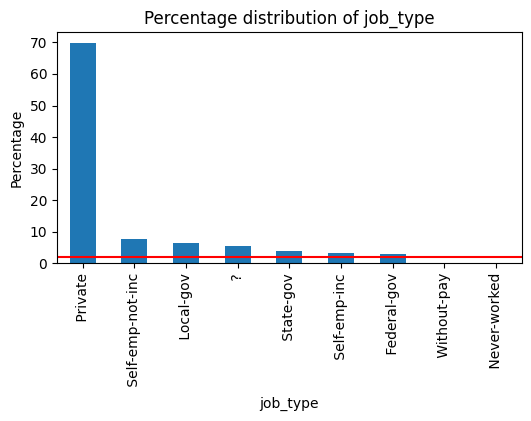

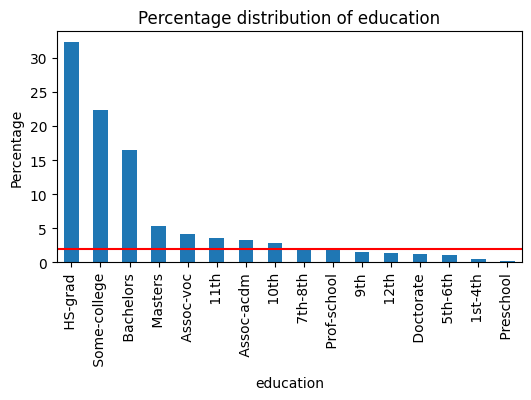

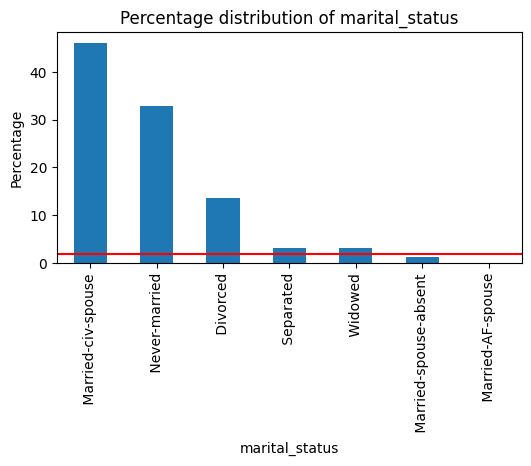

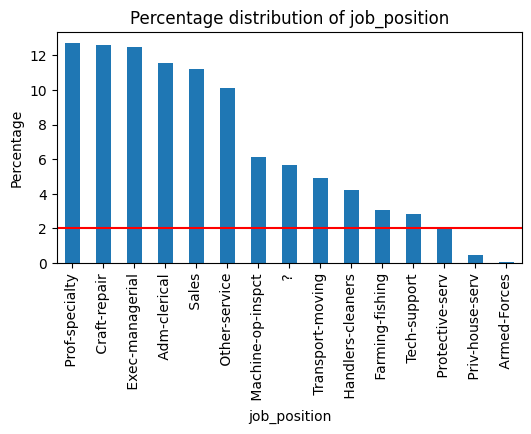

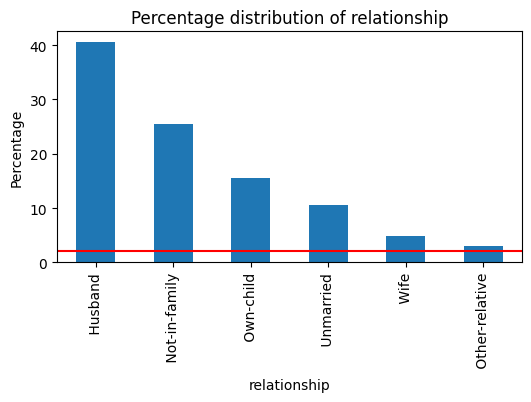

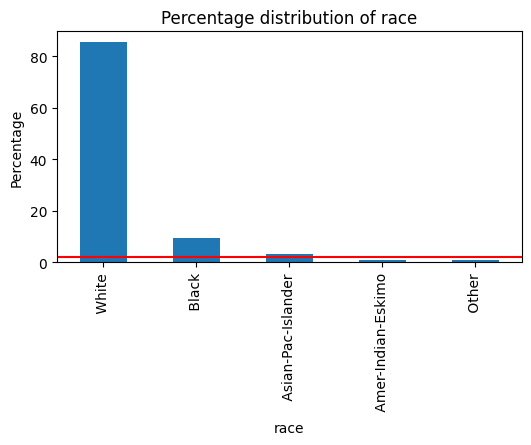

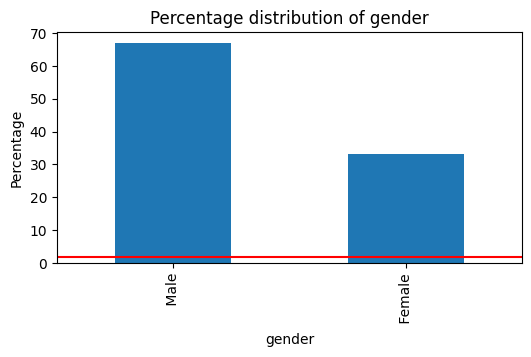

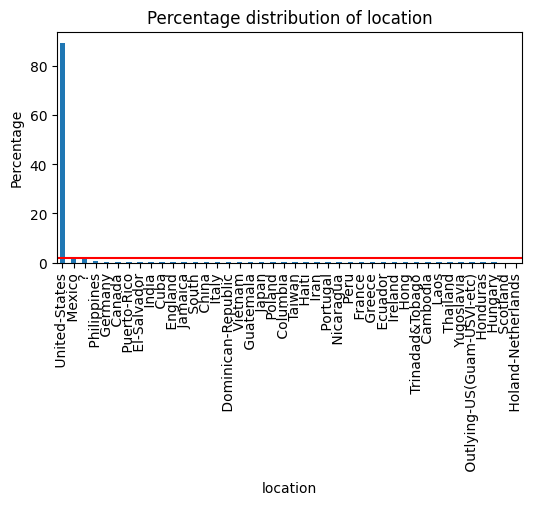

In [76]:
col_name = 'job_type'
def check_cat_distribution(data, col_name, thresh=5):
    a = data[col_name].value_counts(normalize=True)*100
    temp_df = pd.Series(a)
    
    plt.figure(figsize = (6,3))
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col_name)
    fig.axhline(y=2, color='red')
    fig.set_ylabel('Percentage')
    plt.title(f'Percentage distribution of {col_name}')
    plt.show()
for col_name in cat_cols:
    check_cat_distribution(ml_df, col_name)

In [80]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count()/len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    return non_rare

def imp_list(df, col_name, tol):
    max_count = df[col_name].value_counts().values[0]
    thresh = (tol*max_count)/df[col_name].count()
    x = find_non_rare_labels(df, col_name, thresh)
    print(len(x), x)
    return x, thresh

In [97]:
imp_list(ml_df, col_name, tol=0.005)

4 [' ?', ' Mexico', ' Philippines', ' United-States']


([' ?', ' Mexico', ' Philippines', ' United-States'], 0.00447928503424342)

In [93]:
col_name = 'location'
X_train[col_name].value_counts()

location
 United-States                 21870
 Mexico                          508
 ?                               429
 Philippines                     145
 Germany                         106
 Canada                           89
 Puerto-Rico                      88
 El-Salvador                      81
 India                            80
 Cuba                             76
 South                            66
 China                            58
 Jamaica                          58
 England                          58
 Dominican-Republic               55
 Italy                            53
 Vietnam                          48
 Poland                           47
 Columbia                         45
 Taiwan                           42
 Guatemala                        40
 Japan                            39
 Haiti                            31
 Portugal                         30
 Iran                             30
 France                           26
 Ecuador                     

In [87]:
imp_list(X_train, 'location', tol= 0.005)

4 [' ?', ' Mexico', ' Philippines', ' United-States']


([' ?', ' Mexico', ' Philippines', ' United-States'], 0.004477886977886978)

In [79]:
cat_cols_1 = ['job_type', 'education', 'marital_status', 'job_position', 'relationship', 'race', 'gender']
len(cat_cols_1), len(cat_cols)

(7, 8)

In [62]:
sns.ml_df.groupby('job_type').agg(count = ('target', 'count'))

,count
job_type,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


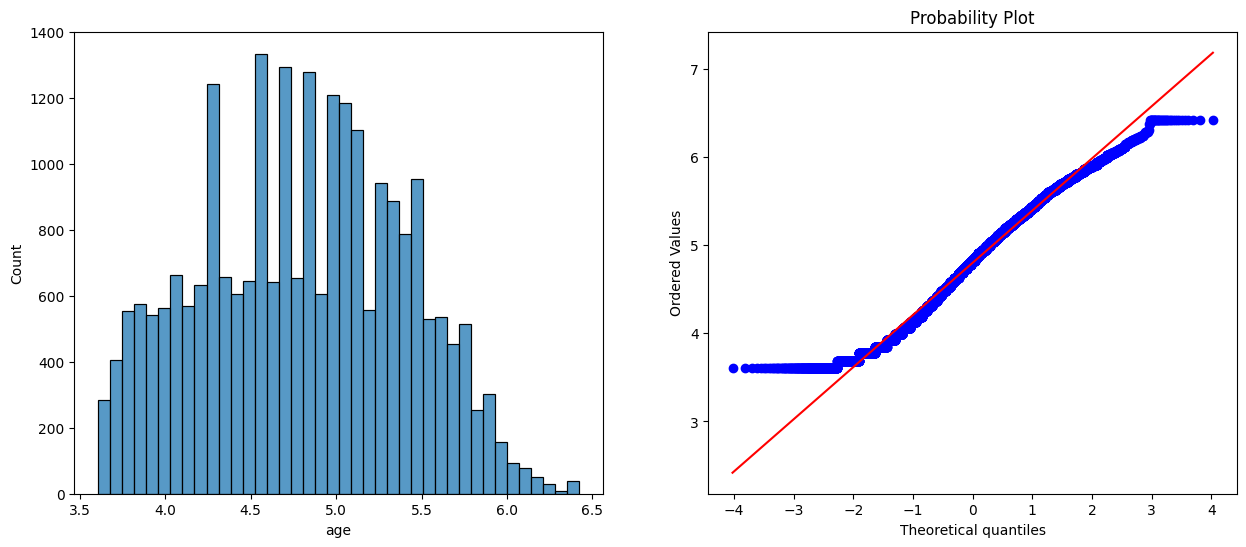

In [41]:
assess_normality(X_train_num1, 'age')

In [36]:
def assess_normality(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=40)
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()
    

In [108]:
X_train['age']

19359    28
15003    35
12490    24
32292    41
5163     27
         ..
31450    55
20560    39
23650    55
25301    26
5800     19
Name: age, Length: 24420, dtype: int64

In [106]:
pip install catboost

You should consider upgrading via the 'c:\users\azeem_sidd\pycharmprojects\ml_pipeline_deploy\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [105]:
# Features Importance



In [104]:
y_test.value_counts()

target
0    6181
1    1960
Name: count, dtype: int64